In [39]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df_monthly = pd.read_csv('housing_in_london_monthly_variables.csv')
df_yearly = pd.read_csv('housing_in_london_yearly_variables.csv')

In [6]:
# knowing what to convert the pandas object data type to  
# read the doc string 
df_monthly.date = pd.to_datetime(df_monthly.date)

In [24]:
# 
# correlation matrix / map
# .corr()
# fill in data with relevant to replace null values (what the data tells us - statistics in columns)
# statistics for data science 
# - medium articles 
# articles - statistics exploratory data analysis 

In [42]:
df_monthly.

AttributeError: 'DataFrame' object has no attribute 'education'

In [38]:
df_monthly.jobedu
df_monthly['job'] = df_monthly['jobedu'].apply(lambda x: x.split(",")[0])

AttributeError: 'DataFrame' object has no attribute 'jobedu'

In [31]:
#df_monthly.drop('customerid',axis=1,inplace=True)
df_monthly['job'] = df_monthly["jobedu"].apply(lambda x: x.split(",")[0])
df_monthly['education'] = df_monthly["jobedu"].apply(lambda x: x.split(",")[1])

KeyError: 'jobedu'

In [15]:
len(df_monthly.borough_flag.unique())

2

In [19]:
len(df_yearly)

1071

In [20]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
code                 1071 non-null object
area                 1071 non-null object
date                 1071 non-null object
median_salary        1049 non-null float64
life_satisfaction    352 non-null float64
mean_salary          1071 non-null object
recycling_pct        860 non-null object
population_size      1018 non-null float64
number_of_jobs       931 non-null float64
area_size            666 non-null float64
no_of_houses         666 non-null float64
borough_flag         1071 non-null int64
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [22]:
df_yearly.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
df_yearly.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [18]:
len(df_yearly.columns)

12

In [14]:
df_monthly.corr()

,average_price,houses_sold,no_of_crimes,borough_flag
average_price,1.000000,-0.168256,0.113835,0.293271
houses_sold,-0.168256,1.000000,0.246839,-0.489623
no_of_crimes,0.113835,0.246839,1.000000,NaN
borough_flag,0.293271,-0.489623,NaN,1.000000


In [152]:
print("Name of columns and type of data in column:\n\n",df_monthly.dtypes)
print("\n")
print("Shape of data frame:" , df_monthly.shape)

Name of columns and type of data in column:

 date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object


Shape of data frame: (13549, 7)


Sum of duplicated data in borough_flag column:  13547
Number of unique values in 'code' column in data frame:  45
Number of unique values in 'date' column in data frame:  301
Number of unique values in 'area' column in data frame:  45
Number of unique values in 'houses_sold' column in data frame:  3947
Number of unique values in 'no_of_crimes' column in data frame:  2670
Number of unique values in 'borough_flag' column in data frame:  2
Number of duplicated vaules in 'average price' column in data frame:  13549
Number of duplicated values in houses_sold column in data frame:  13549
Number of values in each column in data frame:
 date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
borough_flag     13549
dtype: int64
Number of null values in data frame:
 date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag       

NameError: name 'mean' is not defined

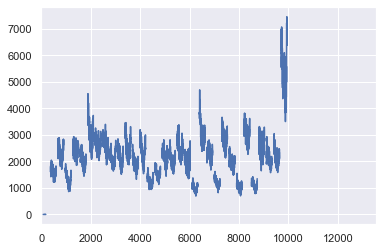

In [10]:
# object data 
print("Sum of duplicated data in borough_flag column: " , df_monthly.duplicated(subset = ['borough_flag']).sum())
print("Number of unique values in 'code' column in data frame: " , len(df_monthly.code.unique()))
print("Number of unique values in 'date' column in data frame: " , len(df_monthly.date.unique()))
print("Number of unique values in 'area' column in data frame: " , len(df_monthly.area.unique()))
print("Number of unique values in 'houses_sold' column in data frame: " , len(df_monthly.houses_sold.unique()))
print("Number of unique values in 'no_of_crimes' column in data frame: " , len(df_monthly.no_of_crimes.unique()))
print("Number of unique values in 'borough_flag' column in data frame: " , len(df_monthly.borough_flag.unique()))
print("Number of duplicated vaules in 'average price' column in data frame: " , len(df_monthly.average_price.duplicated()))
print("Number of duplicated values in houses_sold column in data frame: " , len(df_monthly.houses_sold.duplicated()))
print("Number of values in each column in data frame:\n" , df_monthly.count())
print("Number of null values in data frame:\n" , df_monthly.isnull().sum())
print("Mean value for the no_of_crimes to replace Nan values:\n" , df_monthly.no_of_crimes.mean())
print("Mean value for the houses_sold to replace Nan values:\n" , df_monthly.houses_sold.mean())
print("Plot of no_of_crimes before the null values are filled:\n")
df_monthly.no_of_crimes.plot()
no_of_crimes_mean = df_monthly.no_of_crimes.mean()
df_monthly.no_of_crimes = df_monthly.no_of_crimes.fillna(mean)
print("Plot of no_of_crimes after the null values are filled:\n")
df_monthly.no_of_crimes.plot()
print("Plot of houses_sold before the null values are filled:\n")
df_monthly.houses_sold.plot()
houses_sold_mean = df_monthly.houses_sold.mean()
df_monthly.houses_sold = df_monthly.houses_sold.fillna(houses_sold_mean)
print("Plot of houses_sold after the null values are filled:\n")
df_monthly.houses_sold.plot()
# combinging multiple graphs in one grid 
g = FacetGrid(df_monthly,col='average_price',height = 3.5,aspect = .65)
g.map(sns.lineplot,"date")
# 
sns.lineplot(x=date,y=no_of_crimes)
sns.lineplot(x=date,y=houses_sold)
# plotting data before and after replacing Nan values with mean
df_monthly.info()
# plotting data before and after replacing Nan values with mean
df_monthly.no_of_crimes.plot()
df_monthly.borough_flag.mean()
df_monthly.borough_flag.std()
# count 0's and 1's in column
counts = flags.value_counts()
counts[0], counts[1]
df_monthly = df_monthly.dropna()
df_monthly.count()
print(df_monthly.isnull().sum())
sns.boxplot(x=df_monthly.average_price)
sns.boxplot(x=df_monthly.houses_sold)
sns.boxplot(x=df_monthly.no_of_crimes)
sns.boxplot(x=df_monthly.borough_flag)
# statistics 
q1 = df_monthly.quantile(0.25)
q3 = df_monthly.quantile(0.75)
iqr = q3-q1
print(iqr)
df_monthly = df_monthly[~((df_monthly < (q1-1.5 * iqr)) | (df_monthly > (q3 + 1.5 * iqr))).any(axis=1)]
df_monthly.shape
fig,axs = plt.subplots(3)
fig.suptitle('Comparing Data')
df_monthly.average_price.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Average Price")
plt.xlabel("Price")
plt.ylabel("Not sure")

df_monthly.houses_sold.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Houses Sold")
plt.xlabel("Houses Sold")
plt.ylabel("Not sure")

df_monthly.no_of_crimes.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of Crimes")
plt.xlabel("No. of crimes")
plt.ylabel("Not sure")

plt.figure(figsize = (20,10))
c = df_monthly.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_monthly.date,df_monthly.average_price)
ax.set_xlabel('date')
ax.set_ylabel('average_price')
plt.show()

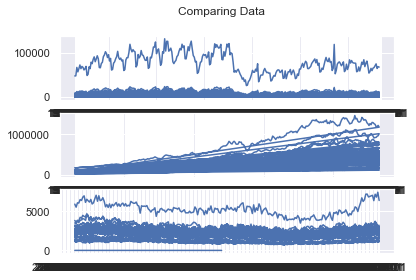

In [19]:
fig,axs = plt.subplots(3)
fig.suptitle('Comparing Data')
axs[0].plot(df_monthly.date,df_monthly.houses_sold)
axs[1].plot(df_monthly.date,df_monthly.average_price)
axs[2].plot(df_monthly.date,df_monthly.no_of_crimes)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

data = pd.read_csv("marketing_analysis.csv", skiprows=2)
data.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


KeyError: 'Column not found: reponse_rate'

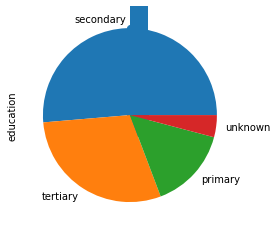

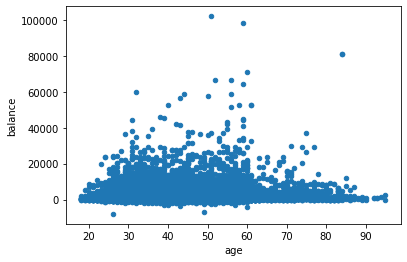

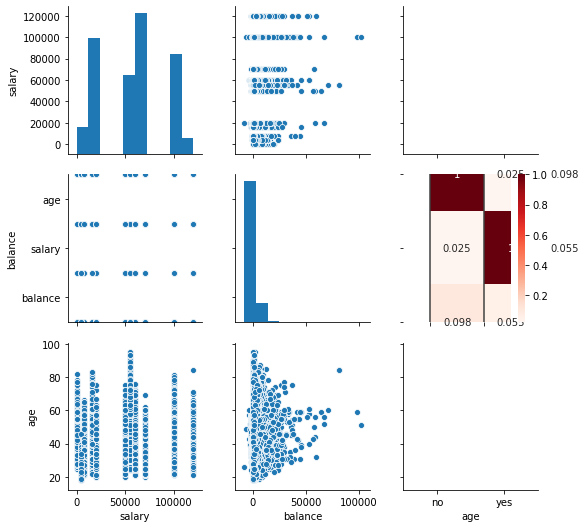

In [65]:
data = pd.read_csv("marketing_analysis.csv", skiprows=2)
data.drop('customerid', axis = 1, inplace=True)
data['job'] = data.jobedu.apply(lambda x: x.split(",")[0])
data['education'] = data.jobedu.apply(lambda x: x.split(",")[1])
data.drop('jobedu',axis = 1, inplace = True)
data = data[~data.age.isnull()].copy()
data = data[~data.month.isnull()].copy()
data = data[~data.response.isnull()].copy()
data.isnull().sum()

data.job.value_counts(normalize=True)
data.job.value_counts(normalize=True).plot.barh()
#plt.show()

month_mode = data.month.mode()
data.month.fillna(month_mode,inplace=True)

data.education.value_counts(normalize=True)
data.education.value_counts(normalize=True).plot.pie()

data.salary.describe()
plt.scatter(data.salary,data.balance)
#plt.show()

data.plot.scatter(x="age",y="balance")
#plt.show()
sns.pairplot(data=data,vars=['salary','balance','age'])
#plt.show()
data[['age','salary','balance']].corr()
sns.heatmap(data[['age','salary','balance']].corr(),annot=True,cmap='Reds')
data.groupby('response')['salary'].mean()
data.groupby('response')['salary'].median()
sns.boxplot(data.response,data.salary)
#plt.show()

data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

data.groupby('marital')['reponse_rate'].mean().plot.bar()
#plt.show()

result = pd.pivot_table(data=data,index = 'education',columns = 'marital',values = 'response_rate')
print(result)

sns.heatmap(result, annot=True,cmap='RdYlGn',center = 0.117)
#plt.show()